# Lab 6 - Classification

Welcome to this week's lab on Classification! This week, we will explore two classification methods: `Logistic Regression` and `KNN`.

## Part 1: Logistic Regression Walkthrough
Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (where there are only two possible outcomes). It is used for binary classification tasks.

In this part, we will implement Logistic Regression to predict whether a patient has a particular disease based on certain diagnostic measurements. We will use a breast cancer dataset available through `sklearn.datasets` .

### Step 1: Import Necessary Libraries

In [1]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load & Split the Dataset

In [2]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Briefly explain the effects of changing the `test_size`.

   
   Changing test size changes the amount of data that is used for testing vs. training.
3. Briefly explain about the `random_state` parameter.

   
   The random_state affects how the data is selected. Changing it will change the randomization.

### Step 3 (optional): EDA

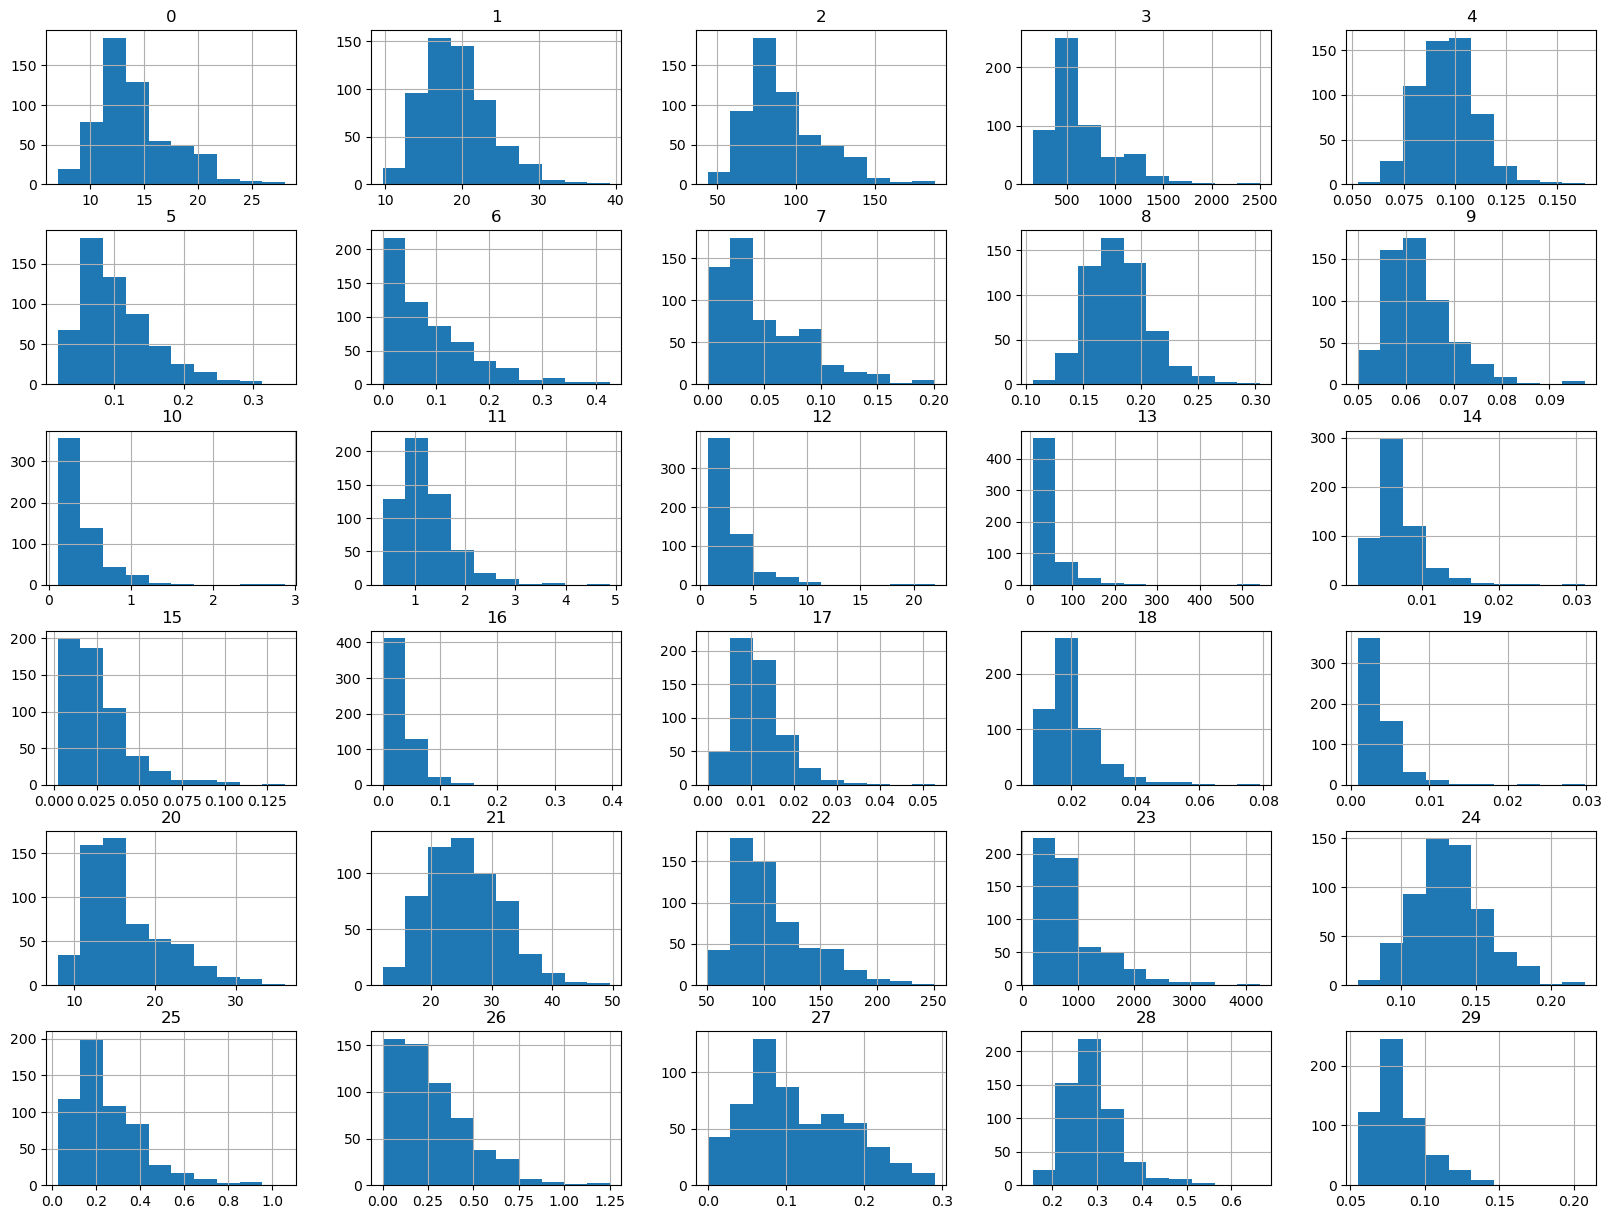

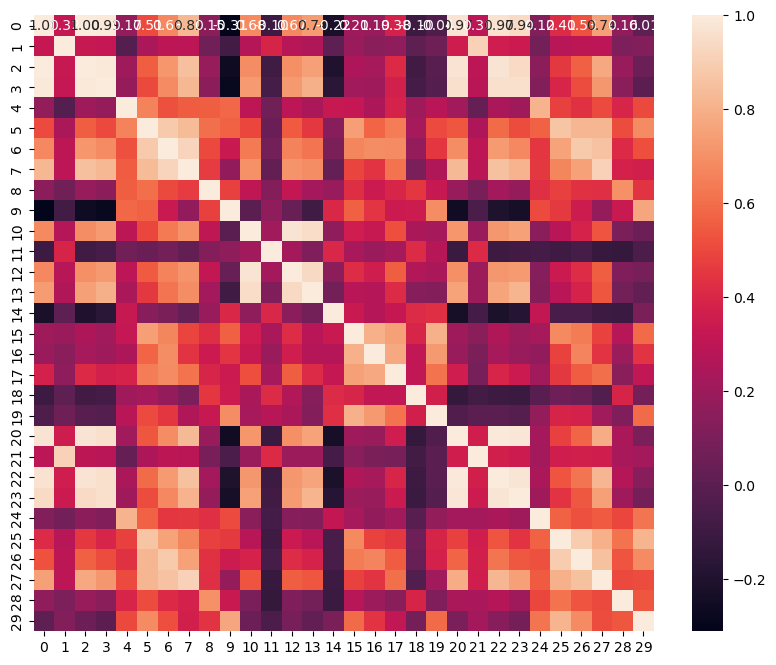

In [3]:
# Here is just an example for EDA.
# EDA: Visualize the data distributions and relationships
# Plotting histograms for each feature

X=pd.DataFrame(X)
X.hist(bins=10, figsize=(20,15))
plt.show()

# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

Why do you think it is important to do EDA while it is not always necessary? 
 It is a good way to visualize and check over the data, seeing trends that may not easily be apparent.

### Step 4: Model Training

In [4]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

1. What is the `max_iter` parameter for?

The amount of iterations that it can use to try and converge on a solution.
   
2. Does `LogisticRegression` accept more parameters? If yes, list and briefly explain some of them.
   
Yes, it does.
Solver is algorithm used for optimization. Accepted arguments: lbfgs, liblinear, newton-cg, newton-cholesky, sag, saga
One additional parameter is penalty: l1, l2, elasticnet, none. This penalty term helps guard against overfitting.
Random state is the same as above, used to randomize/shuffle the data.

### Step 5: Model Evaluation

In [5]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, predictions)}')
print(classification_report(y_test, predictions))

Accuracy: 0.956140350877193
ROC AUC Score: 0.9464461185718965
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Briefly explain about `ROC` and `AUC`.

ROC - Reciever Operator Characeristic curve plots TPR vs. FPR, separates singal from the noise. It shows performance of classification method at all thresholds.

AUC - Area Under Curve: measures ability of model to distinguish between classes.

## Part 2: Implement a KNN Model

K-Nearest Neighbors (KNN) is an instance-based learning algorithm where the class of a sample is determined by the majority class among its K nearest neighbors.
For this part, use the Iris dataset and create a KNN model to classify Iris plants into three species based on the sizes of their petals and sepals.

### Task 1: Implement the KNN Pipeline

In [6]:
#1. imports
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


In [7]:
#2. load iris set
iris = sklearn.datasets.load_iris()


In [8]:
#3. set up data

x=iris.data
y=iris.target


In [9]:
#et up test and train data
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, shuffle= True, random_state=52)
#change into np array
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)
x_test= np.asarray(x_test)
y_test= np.asarray(y_test)


In [10]:
#set up knn model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

#use the model
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.967
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.89      0.94         9
           2       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Task 2: Explain your implementation
Provide detailed explanation and discussion about your implementation. Break it down to different steps as relevant to your implementation.

1. Firstly, we do all of our imports. We need the KNeighborSClasssifier, SKLearn Datasets, numpy, test_train_split, and the evaluation scores for accuracy and classification report.
2. Then, we set up our data for implementing the model - we import the data as iris, setting our X as the data columns and the Y as the target (classes of iris). This is because we want to predict our target/class based on the values of our data columns.
3. Set up x-test, y-test, x-train, y-train using test_train_split. I choose to shuffle randomly, but it's not necesssary.
4. Set up a KNeighborsClassifier, and fit the data to it.
5. Using the model we just trained, we predict the classes of the test x data.
6. Evaluate model with accuracy and classification report, so we can see how it did. 

## Submission
Submit a link to your completed Jupyter Notebook file hosted on your private GitHub repository through the submission link in Blackboard.